In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/nfl_scores_processed.csv')

# drop the 'schedule_date', 'weather_detail' and 'over_under_line' column
df = df.drop(['schedule_date', 'weather_detail', 'over_under_line'], axis=1)

# drop all rows with 'winner' = tie
df = df[df['winner'] != 'tie']

# Convert to categorical variables
categorical_cols = ['schedule_week', 'team_home', 'team_away', 'team_favorite_id', 'home_1', 'away_1', 'home_2', 'away_2', 'home_3', 'away_3', 'home_4', 'away_4', 'home_5', 'away_5', 'home_6', 'away_6', 'home_7', 'away_7', 'home_8', 'away_8', 'home_9', 'away_9', 'home_10', 'away_10']
df[categorical_cols] = df[categorical_cols].astype('category')

# convert 'winner' to 0 or 1
df['winner'] = df['winner'].map({'home': 0, 'away': 1})

# drop all rows with NaN
df = df.dropna()

In [24]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('winner', axis=1), df['winner'], test_size=0.2)

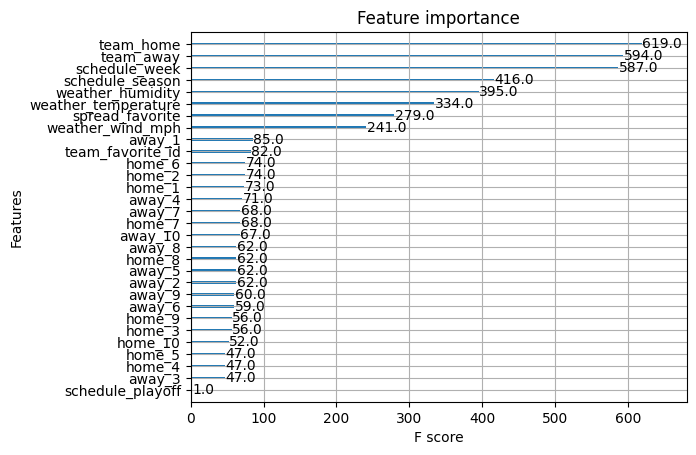

In [25]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, DMatrix, plot_importance

# create DMatrix
dtrain = DMatrix(X_train, label=y_train, enable_categorical=True)

# create XGBoost model
clf = XGBClassifier(tree_method="hist", enable_categorical=True)
clf.fit(X_train, y_train)

plot_importance(clf)
plt.show()